In [1]:
import sys
sys.path.append("../code/")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from create_matrix import *
from common import create_region_df_dfc_static

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']

import os

In [4]:
def get_tensor_appliance(df, dfc, appliance):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] ]).flatten()
    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 1, stop - start))
    M, N, O = tensor.shape
    return tensor

In [5]:
def get_tensor(df):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()
    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())

    #dfc = df.copy()

    df = df[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [6]:
region = 'Austin'
year = 2014

df, dfc, tensor, static_region = create_region_df_dfc_static(region, year, start=1, stop=13)

In [9]:
o = {}
for appliance in APPLIANCES_ORDER[:]:
    o[appliance] = {}
    for month in range(1, 13):
        o[appliance][month] = {}
        for i, e in enumerate(['area','total_occupants','num_rooms']):
            o[appliance][month][e] = df[['{}_{}'.format(appliance, month),e]].dropna().corr().values[0, 1]

In [11]:
%matplotlib inline

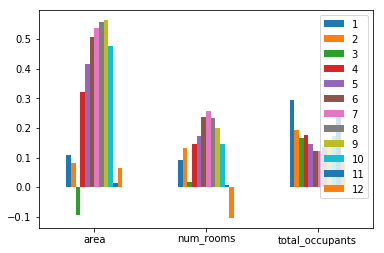

In [12]:
pd.DataFrame(o['hvac']).plot(kind='bar',rot=0)

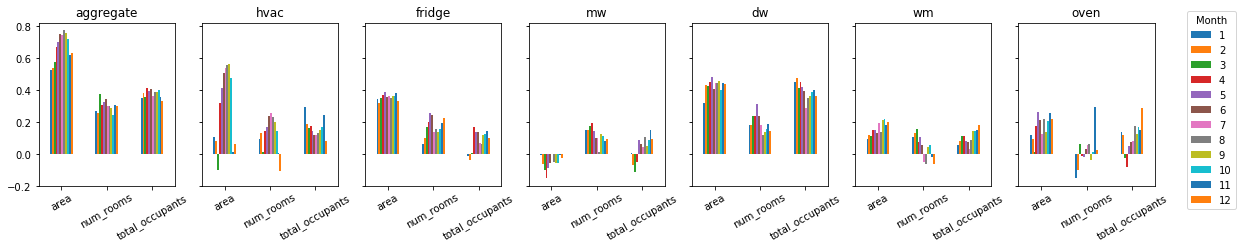

In [13]:
fig, ax = plt.subplots(ncols=7, figsize=(20, 3), sharey=True)
for col, appliance in enumerate(APPLIANCES_ORDER):
    pd.DataFrame(o[appliance]).plot(kind='bar',rot=30, legend=False, ax=ax[col], title=appliance)
plt.legend(bbox_to_anchor=(1.2, 1.1), title='Month')


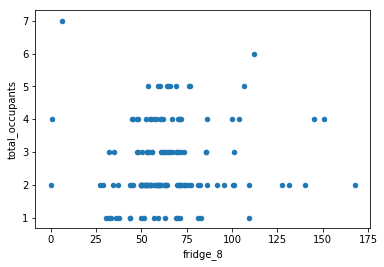

In [95]:
appliance='fridge'
month = 8
e= 'total_occupants'
df[['{}_{}'.format(appliance, month),e]].plot(kind='scatter',x='{}_{}'.format(appliance, month),y=e)

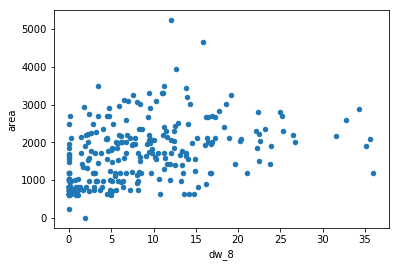

In [18]:
appliance='dw'
month = 8
e= 'area'
df[['{}_{}'.format(appliance, month),e]].plot(kind='scatter',x='{}_{}'.format(appliance, month),y=e)

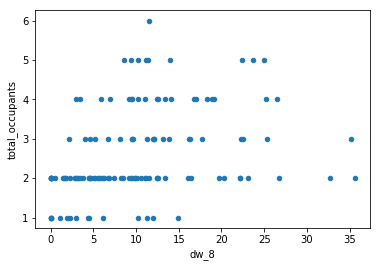

In [17]:
appliance='dw'
month = 8
e= 'total_occupants'
df[['{}_{}'.format(appliance, month),e]].plot(kind='scatter',x='{}_{}'.format(appliance, month),y=e)

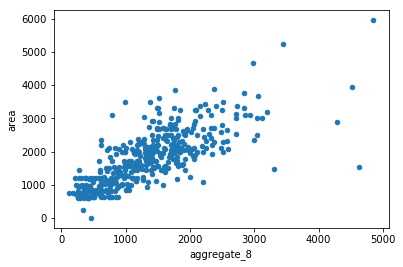

In [70]:
appliance='aggregate'
month = 8
e= 'area'
df[['{}_{}'.format(appliance, month),e]].plot(kind='scatter',x='{}_{}'.format(appliance, month),y=e)

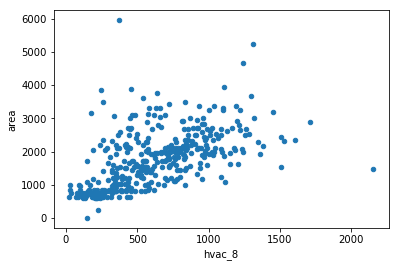

In [16]:
appliance='hvac'
month = 8
e= 'area'
df[['{}_{}'.format(appliance, month),e]].plot(kind='scatter',x='{}_{}'.format(appliance, month),y=e)

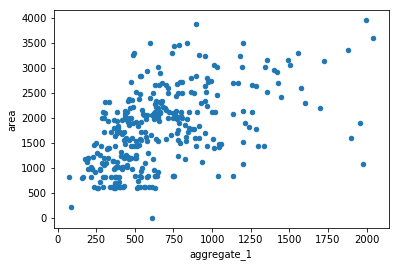

In [14]:
appliance='aggregate'
month = 1
e= 'area'
df[['{}_{}'.format(appliance, month),e]].plot(kind='scatter',x='{}_{}'.format(appliance, month),y=e)

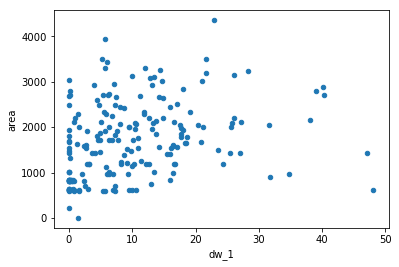

In [15]:
appliance='dw'
month = 1
e= 'area'
df[['{}_{}'.format(appliance, month),e]].plot(kind='scatter',x='{}_{}'.format(appliance, month),y=e)

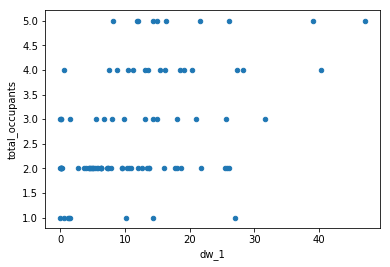

In [19]:
appliance='dw'
month = 1
e= 'total_occupants'
df[['{}_{}'.format(appliance, month),e]].plot(kind='scatter',x='{}_{}'.format(appliance, month),y=e)